# EDA for Kaggle NYC Rent data set

EDA is a very broad term, but I take it to mean "extracting useful information or formulating new questions about a population of entities based upon the data set." This could be everything from interesting tidbits about how many people live in a particular area. Or, we could discover important marketing information, such as what product characteristics people are willing to pay for.

One of the best ways to learn EDA, is to walk through an actual data set together, picking apart the data to ask questions and answer them. Sometimes we don't know what the questions are until we see the data. As you'll see, we will often ask the question: "Whoa! What's going on with the data here?"

## Getting and loading data

If you have not done so already, please register at [kaggle.com](kaggle.com); I just signed in through my Google account so it was pretty easy.

Once you have registered, you can download the `train.json.zip` file on the [Two Sigma Connect: Rental Listing Inquiries](https://www.kaggle.com/c/two-sigma-connect-rental-listing-inquiries/data) data page.  I'm not allowed to re-host that data so you have to register and download yourself. Be organized and store that data file, and unzip it, in a standard data directory you will use for this course. In my case, I store it in a `data` directory underneath my notebooks directory.



In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
#%config InlineBackend.figure_format = 'svg'   # svg vs png format make sharper images!
%config InlineBackend.figure_format = 'retina' # much faster than svg when generating lots of points

The file is stored in what we call the JSON (JavaScript object notation), rather than CSV, but pandas knows how to load it also:

In [3]:
df_rent = pd.read_json('data/train.json')

### Exercise 1

1.  Register at Kaggle; using the same user id as your USF google account is a good idea.
1.  Download and unzip train.json.zip into a data directory that you can specify easily from the directory containing this notebook; if you make `data` a subdirectory, like I do, then you can access the file  with past specifier `'data/train.json'`.
1.  Read the json file into variable `df_rent`.

## Getting an initial sniff

Step one: how big is this thing and what are the column names and their datatypes?

In [4]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [5]:
len(df_rent)

49352

In [6]:
df_rent.head(2)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low


When the data is very wide like this, sometimes it makes sense to show the transpose:

In [7]:
df_rent.head(2).T

,4,6
bathrooms,1,1
bedrooms,1,2
building_id,8579a0b0d54db803821a35a4a615e97a,b8e75fc949a6cd8225b455648a951712
created,2016-06-16 05:55:27,2016-06-01 05:44:33
description,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...
display_address,145 Borinquen Place,East 44th
features,"[Dining Room, Pre-War, Laundry in Building, Di...","[Doorman, Elevator, Laundry in Building, Dishw..."
latitude,40.7108,40.7513
listing_id,7170325,7092344
longitude,-73.9539,-73.9722


Okay, so this is a lot more complicated than the toys we've looked at so far. First, it has many more rows, almost 50,000. Second, there are a lot more columns and we have integers, floats, and strings.

Are there any missing values, at least those signified with NaN.  Keep in mind, that there may be some values that were not physically missing but have sentinel values that indicate missing.  Luckily, there is no obviously missing data:

In [8]:
df_rent.isnull().any()

bathrooms          False
bedrooms           False
building_id        False
created            False
description        False
display_address    False
features           False
latitude           False
listing_id         False
longitude          False
manager_id         False
photos             False
price              False
street_address     False
interest_level     False
dtype: bool

Look at the sample data now and see what kind of stuff is in each column. There are three that are interesting from initial inspection: `features`, `photos`, and `interest_level`.

In [9]:
df_rent['features'].head(3)

4    [Dining Room, Pre-War, Laundry in Building, Di...
6    [Doorman, Elevator, Laundry in Building, Dishw...
9    [Doorman, Elevator, Laundry in Building, Laund...
Name: features, dtype: object

In [10]:
df_rent['photos'].head(3)

4    [https://photos.renthop.com/2/7170325_3bb5ac84...
6    [https://photos.renthop.com/2/7092344_7663c19a...
9    [https://photos.renthop.com/2/7158677_c897a134...
Name: photos, dtype: object

In [11]:
df_rent['interest_level'].head(3)

4    medium
6       low
9    medium
Name: interest_level, dtype: object

The first two look like lists of stuff and the last one looks like a categorical variable (which we'll deal with shortly).

In [12]:
df_rent.loc[6,'features'] # pick a row and show the list of features

['Doorman',
 'Elevator',
 'Laundry in Building',
 'Dishwasher',
 'Hardwood Floors',
 'No Fee']

In [13]:
df_rent.loc[6,'photos'] # pick a row and show the list of phone urls

['https://photos.renthop.com/2/7092344_7663c19af02c46104bc4c569f7162ae0.jpg',
 'https://photos.renthop.com/2/7092344_8287349abe511d195a7b6129bf24af0e.jpg',
 'https://photos.renthop.com/2/7092344_e9e6a2b7aa95aa7564fe3318cadcf4e7.jpg',
 'https://photos.renthop.com/2/7092344_d51ee4b92fd9246633f93afe6e86d8f0.jpg',
 'https://photos.renthop.com/2/7092344_f0573fa184ca130b1b6000f2fa90511c.jpg',
 'https://photos.renthop.com/2/7092344_b2a62f769a59a317b0a243000db46fd0.jpg']

Because we read in the data with JSON and not CSV,  pandas has created actual list objects for us, since that is how they were represented in JSON format. So these are not stored as strings but as lists. Anything nonnumeric, pandas stores as "Object":

In [14]:
df_rent['features'].dtype  # "O" is for object

dtype('O')

In [15]:
f = df_rent.loc[6,'features']  # features four row identified by 6 in the index
type(f)

list

## Identifying categorical variables

One of the features (columns) is clearly a categorical variable. In particular, it is an ordinal categorical variable; "ordinal" stands for ordered.

In [16]:
df_rent['interest_level'].unique()  # yep, looks like an ordinal categorical

array(['medium', 'low', 'high'], dtype=object)

So, let's convert it so that it has the proper data type:

In [17]:
df_rent['interest_level'] = df_rent['interest_level'].astype('category')
df_rent['interest_level'] = df_rent['interest_level'].cat.as_ordered()
df_rent['interest_level']

4         medium
6            low
9         medium
10        medium
15           low
           ...  
124000       low
124002    medium
124004    medium
124008    medium
124009      high
Name: interest_level, Length: 49352, dtype: category
Categories (3, object): [high < low < medium]

 Once we have converted a column to be categorical, we can then access a group of functions via `cat`.  Above, `df_rent['interest_level'].cat.foo` accesses any category related functions or values associated with that particular column. For example, here is how to get the integer representation for each category level:

In [18]:
df_rent['interest_level'].cat.codes

4         2
6         1
9         2
10        2
15        1
         ..
124000    1
124002    2
124004    2
124008    2
124009    0
Length: 49352, dtype: int8

That category order doesn't look right so let's make sure that it goes from low to high. We want  low=0, medium=1, high=2. The reason to do so is mainly for modeling purposes, but it's a good idea to be rigorous.

In [19]:
df_rent['interest_level'] = df_rent['interest_level'].cat.reorder_categories(['low','medium','high'])
df_rent['interest_level']

4         medium
6            low
9         medium
10        medium
15           low
           ...  
124000       low
124002    medium
124004    medium
124008    medium
124009      high
Name: interest_level, Length: 49352, dtype: category
Categories (3, object): [low < medium < high]

In [20]:
df_rent['interest_level'].cat.codes

4         1
6         0
9         1
10        1
15        0
         ..
124000    0
124002    1
124004    1
124008    1
124009    2
Length: 49352, dtype: int8

Now the categories are correctly mapped to 0, 1, and 2.

## Basic exploration of numerical features

### Uniqueness, counts, histograms

In [21]:
df_rent['bedrooms'].unique()

array([1, 2, 3, 0, 4, 5, 6, 8, 7])

In [22]:
df_rent['bedrooms'].value_counts()

1    15752
2    14623
0     9475
3     7276
4     1929
5      247
6       46
8        2
7        2
Name: bedrooms, dtype: int64

In [23]:
df_rent['bathrooms'].unique()

array([ 1. ,  1.5,  2. ,  0. ,  3. ,  4. ,  2.5,  4.5,  3.5,  5. ,  6. ,
        6.5,  5.5,  7. , 10. ])

In [24]:
df_rent['bathrooms'].value_counts()

1.0     39422
2.0      7660
3.0       745
1.5       645
0.0       313
2.5       277
4.0       159
3.5        70
4.5        29
5.0        20
5.5         5
6.0         4
10.0        1
6.5         1
7.0         1
Name: bathrooms, dtype: int64

In [25]:
df_rent['manager_id'].value_counts().head(5)

e6472c7237327dd3903b3d6f6a94515a    2533
6e5c10246156ae5bdcd9b487ca99d96a     711
8f5a9c893f6d602f4953fcc0b8e6e9b4     410
62b685cc0d876c3a1a51d63a0d6a8082     402
cb87dadbca78fad02b388dc9e8f25a5b     373
Name: manager_id, dtype: int64

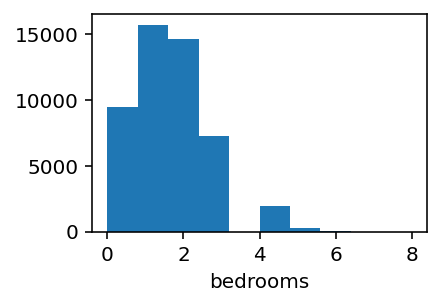

In [26]:
fig, ax = plt.subplots(figsize=(3,2))
ax.hist(df_rent['bedrooms'])
ax.set_xlabel("bedrooms")
plt.show()

Here's how you put two graphs side-by-side:

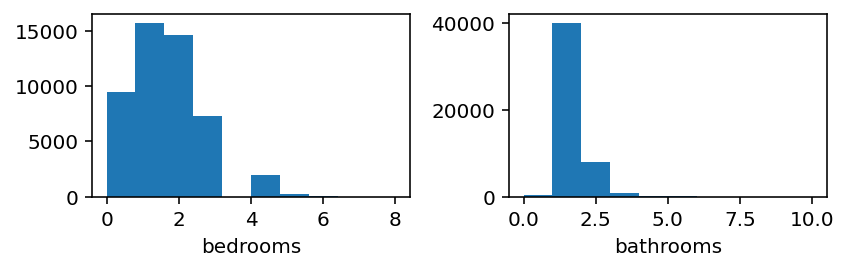

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6,2))
axes[0].hist(df_rent['bedrooms'])
axes[0].set_xlabel("bedrooms")
axes[1].hist(df_rent['bathrooms'])
axes[1].set_xlabel("bathrooms")
plt.tight_layout() #  Not sure why we need this but we do, to separate the plots!
plt.show()

## Anomalies!

Another interesting histogram is the price:

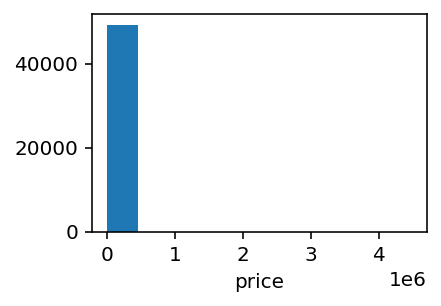

In [28]:
fig, ax = plt.subplots(figsize=(3,2))
ax.hist(df_rent['price'])
ax.set_xlabel("price")
plt.show()

Uh oh.  That looks very strange.  Let's look at a reverse sort of the prices:

In [29]:
df_rent['price'].sort_values(ascending=False).head(10)

32611     4490000
12168     1150000
57803     1070000
55437     1070000
123877     135000
4620       111111
91709      100000
54148       90000
116586      85000
96905       80000
Name: price, dtype: int64

Some of the apartments cost over 1 million a month! That doesn't make any sense.  How can this be?  After poking around a little bit, it will become clear that people are putting their apartments for sale not rent on this website as well. If we plot only those records with a maximum price of \$10,000 we'll see something a little more interesting.

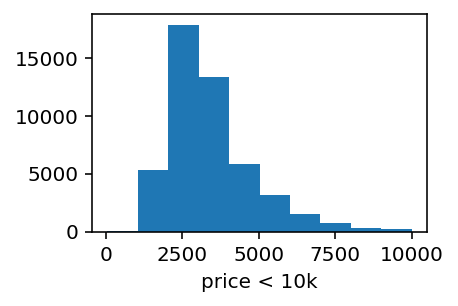

In [30]:
df_cheap = df_rent[df_rent['price']<=10_000]
fig, ax = plt.subplots(figsize=(3,2))
ax.hist(df_cheap['price'])
ax.set_xlabel("price < 10k")
plt.show()

We can even learn something interesting about how many photos people post about their apartments for rent.  Let's compute the length of each list of photos per record. The way we do that is to tell pandas to apply the Python `len` function to each element of the column:

In [31]:
numphotos = df_rent['photos'].apply(len)
numphotos.head(5)

4     12
6      6
9      6
10     5
15     4
Name: photos, dtype: int64

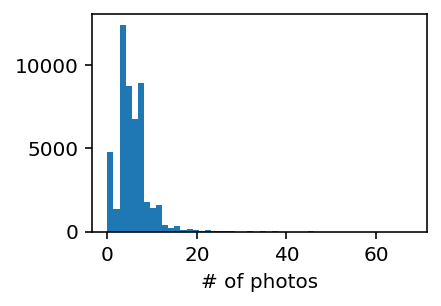

In [32]:
fig, ax = plt.subplots(figsize=(3,2))
ax.hist(numphotos, bins=50)
ax.set_xlabel("# of photos")
plt.show()

Why does the graph look weird? there must be something in the right tail.

In [33]:
numphotos.min(), numphotos.max()

(0, 68)

Someone posted 68 photos for the apartment. what?  The sounds like something we should investigate. We need to filter the data frame for those records with a lot of photos. The simplest approach is to inject the `numphotos` as a column and then use that as a filter.

In [34]:
df_rent['numphotos'] = numphotos
df_rent[df_rent['numphotos']>60]

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,numphotos
32963,3.0,3,0,2016-06-25 02:54:01,"BACK TO SCHOOL ! FAMILY HOME, three BIG bedroo...",The Somerset 1365 York Avenue,"[Fitness Center, Childrens Playroom, Residents...",40.7674,7214466,-73.9538,9df32cb8dda19d3222d66e69e258616b,[https://photos.renthop.com/2/7214466_4000a418...,7995,The Somerset 1365 York Avenue,low,68


It looks like it's just one record with that many images. Use the index to grab it and show the list of pictures for fun.

In [35]:
photos = df_rent.loc[32963, 'photos']
photos[0:5]

['https://photos.renthop.com/2/7214466_4000a418d3e449a7a0506c3166168393.jpg',
 'https://photos.renthop.com/2/7214466_67b015ddb5a7b7cf7370f865e2e533f9.jpg',
 'https://photos.renthop.com/2/7214466_0c86333bb7c566932a7709c395554db3.jpg',
 'https://photos.renthop.com/2/7214466_0aa3cc4dadeb2322116e7617bf812c29.jpg',
 'https://photos.renthop.com/2/7214466_33f3db4f14ba0f4fb3ae31846eda36d6.jpg']

Picking one at random, here's what it looks like:<br>
<img src="https://photos.renthop.com/2/7214466_33f3db4f14ba0f4fb3ae31846eda36d6.jpg" width="150">

In [36]:
df_rent.loc[32963, 'price'] # how much per month? ~8k$

7995

I see nothing crazy about the apartment other than the number of images they posted. My conclusion is that they really want to rent this place, but nothing is suspicious.  The point is here that you have to dig around in the data as part of the exploration and use your brain. It's not just calling functions.

### Exercise 2

There's something strange with the histogram of bathrooms above.

1. Read in the data and plot the histogram for bathrooms
1. Look at the `value_counts()`
1.  Filter the data frame for records whose bathrooms is above six
1. There are 3 such records. Do you notice anything unusual about one of them? Look at the price and number of bedrooms. Something doesn't seem right here.
1.  Extract the photos list of URLs and check them out for the apartment with 10 bathrooms. They do not seem to be a good representation of a place with 10 bathrooms.
1.  Read the description associated with the apartment.  All in all, I think we can conclude that somebody typed in 10 bathrooms but they meant 1. It's a typo.

## Digging deeper into the data

###  The relationship between features

If I were trying to rent an apartment, I'd like to know what people are willing to pay for. That means we should look at the relationship between various features and rent price. Let's start out by blindly computing the correlation coefficient between bedrooms in price then bathrooms in price:

In [37]:
np.corrcoef(df_rent['bedrooms'], df_rent['price'])

array([[1.        , 0.05178807],
       [0.05178807, 1.        ]])

In [38]:
np.corrcoef(df_rent['bathrooms'], df_rent['price'])

array([[1.        , 0.06966123],
       [0.06966123, 1.        ]])

That is very strange. There's not seem to be a correlation, which is counterintuitive. Either our intuition is wrong or the data is wrong, or at least misleading.   Recall that there are some apartments that are for sale rather than for rent so let's filter those out:

In [39]:
df_rent = df_rent[df_rent['price']<=10_000].copy()
len(df_rent)

48474

And now, by magic, all the sudden we are seeing strong correlations:

In [40]:
np.corrcoef(df_rent['bedrooms'], df_rent['price'])[0,1]

0.5596391219420096

In [41]:
np.corrcoef(df_rent['bathrooms'], df_rent['price'])[0,1]

0.6359309382693218

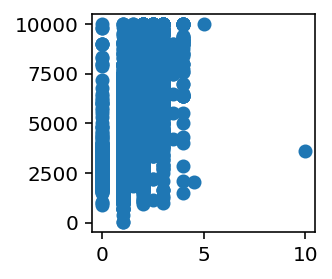

In [42]:
fig, ax = plt.subplots(figsize=(2,2))  # make one subplot (ax) on the figure
ax.scatter(df_rent['bathrooms'], df_rent['price'])
plt.show()

This graph is hard to read so let's add labels and  make the dots semi transparent using the alpha channel:

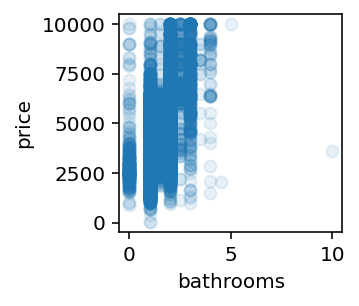

In [43]:
fig, ax = plt.subplots(figsize=(2,2))  # make one subplot (ax) on the figure
ax.scatter(df_rent['bathrooms'], df_rent['price'], alpha=.1)

ax.set_xlabel("bathrooms")
ax.set_ylabel("price")
plt.show()

Ok, we can see here that, for a given number of bathrooms, there is a wide range of rent prices: the vertical dots for any X location are widely spread out.

A better visualization would probably be a box plot or violin plot.  In both cases, we need a list of values for each box or "violin", which we can do by selecting the price for all low, medium, and high interest levels:

In [44]:
low = df_rent[df_rent['interest_level']=='low']['price'].values
med = df_rent[df_rent['interest_level']=='medium']['price'].values
hi  = df_rent[df_rent['interest_level']=='high']['price'].values

#### Question

Please explain the order of operations and the data type of each sub expression for the assignment to `low`.

Ok, and here's how to do the box and violin plot together:

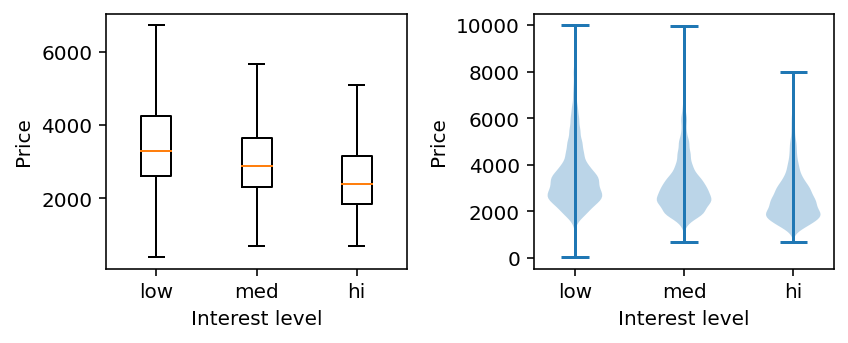

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6,2.5))  # make side-by-side plot

axes[0].boxplot([low, med, hi], showfliers=False) # don't show outliers
axes[0].set_xticks(range(1,3+1))
axes[0].set_xticklabels(['low','med','hi'])  # set labels on the X axis
axes[0].set_xlabel("Interest level")
axes[0].set_ylabel("Price")

axes[1].violinplot([low, med, hi])
axes[1].set_xticks(range(1,3+1))
axes[1].set_xticklabels(['low','med','hi'])  # set labels on the X axis
axes[1].set_xlabel("Interest level")
axes[1].set_ylabel("Price")

plt.tight_layout()
plt.show()

From this, we can conclude that the highest interest concentration is for lower-priced apartments.

From matplotlib doc: "*The box extends from the lower to upper quartile values of the data, with a line at the median. The whiskers extend from the box to show the range of the [quartile] data.*"

### Exercise 3

1.  Using the column we injected, `numphotos`, display the correlation between the number of photos and the price of an apartment
1.  Plot a scatterplot of `numphotos` versus price
1.  Give a violin plot for the price of one, two, and three bedroom apartments.

## Grouping records by feature

The correlation coefficient and visual representations of the relationship between two features are very useful, but we sometimes want to know the average value of one column  grouping by another column. For example, here is how to group the records by the number of bedrooms and get the average number of all other numeric columns:

In [46]:
df_rent.groupby('bedrooms').mean()

,bathrooms,latitude,listing_id,longitude,price,numphotos
bedrooms,,,,,,
0,0.987579,40.746874,7.023057e+06,-73.970871,2458.417548,4.747886
1,1.015403,40.741300,7.022789e+06,-73.954727,3049.982025,5.338732
2,1.239506,40.736987,7.024414e+06,-73.945676,3711.253521,5.909210
3,1.499342,40.750144,7.026954e+06,-73.970372,4530.971650,6.367529
4,1.853283,40.751452,7.025677e+06,-73.971490,5567.099942,6.401511
5,2.301105,40.755673,7.020731e+06,-73.968161,7157.121547,7.585635
6,2.894737,39.701750,7.038876e+06,-72.021653,8042.078947,5.526316
7,3.000000,40.676100,6.828612e+06,-73.945900,6923.000000,12.000000
8,3.500000,40.682250,7.185848e+06,-73.966000,8247.500000,10.000000


In this case, we can see that as the number of bedrooms increases, so do the number of bathrooms, the price, and also the number of photos. Interesting marketing information.

To get just one of the columns,  use the index operator; note that the result of this operation is a data frame and so the index operator will give you a column or columns:

In [47]:
df_avg = df_rent.groupby('bedrooms').mean() # results in a data frame
df_avg['price'] # What is the result type of this expression? Series

bedrooms
0    2458.417548
1    3049.982025
2    3711.253521
3    4530.971650
4    5567.099942
5    7157.121547
6    8042.078947
7    6923.000000
8    8247.500000
Name: price, dtype: float64

In [48]:
df_avg[['bathrooms','price']]

,bathrooms,price
bedrooms,,
0,0.987579,2458.417548
1,1.015403,3049.982025
2,1.239506,3711.253521
3,1.499342,4530.971650
4,1.853283,5567.099942
5,2.301105,7157.121547
6,2.894737,8042.078947
7,3.000000,6923.000000
8,3.500000,8247.500000


### Group by more than one column

We can also group by more than one column. Let's say we'd like to know the count of apartments with various combinations of bedrooms and bathrooms. We can use the `count()` function on the grouped data frame then pull out an arbitrary column, since they will all have the same count values:

In [49]:
df_counts = df_rent.groupby(['bedrooms','bathrooms']).count()
df_counts['price'].head(10)

bedrooms  bathrooms
0         0.0            154
          1.0           9267
          1.5              9
          2.0             29
          4.0              1
1         0.0             73
          1.0          15297
          1.5            152
          2.0            205
          2.5              2
Name: price, dtype: int64

Here's a trick for you that displays things in a nicer way. What we have is okay but it's displaying things like a series, not a data frame. If we pass in a list, albeit with a single column name, we can display results like a data frame:

In [50]:
df_counts[['price']].head(10)

price
bedrooms bathrooms       
0        0.0          154
         1.0         9267
         1.5            9
         2.0           29
         4.0            1
1        0.0           73
         1.0        15297
         1.5          152
         2.0          205
         2.5            2

What can we learn from this grouping? It seems to me that one bedroom one bath apartments are the most common followed by studios, one bathroom no bedrooms.

### Line plots for bedrooms and bathrooms versus price (more matplotlib options)

Let's plot the relationship between bedrooms, bathrooms and price. We will use one curve for bedrooms and one for bathrooms, demonstrating how to do more than one curve on a single plot.

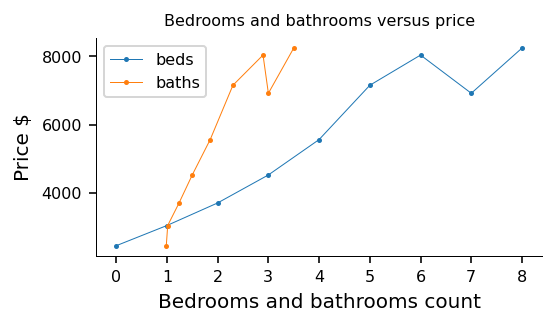

In [51]:
fig, ax = plt.subplots(figsize=(4,2))
ax.plot(df_avg.index, df_avg['price'], '.-', lw=.5, markersize=3, label="beds")
ax.plot(df_avg['bathrooms'], df_avg['price'], '.-', lw=.5, markersize=3, label="baths")
ax.set_xlabel('Bedrooms and bathrooms count')
ax.set_ylabel('Price \$')
ax.set_xticks(range(0,8+1)) # show all ticks

ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=8)

ax.set_title("Bedrooms and bathrooms versus price", fontsize=8)
plt.legend(fontsize=8) # use "label" parameters from ax.plot()
plt.show()

This gives us an apparently clear picture of the relationship between bedrooms and price and also bathrooms and price.

### Question

Or, does it? What's the problem with that assumption?

### How to hold variables constant and consider price

You often hear in medical journal papers about "controlling for other factors". Another version is to "all other variables held constant, what is the effect of x on y?" That actually gives us a hint about how to solve this problem. It's a technique called *stratification*. Let's look again at the data set grouped by the number of bedrooms. The average price is given for all apartments with the same number of bedrooms.

In [52]:
df_avg = df_rent.groupby('bedrooms').mean()
df_avg[['price']]

,price
bedrooms,
0,2458.417548
1,3049.982025
2,3711.253521
3,4530.971650
4,5567.099942
5,7157.121547
6,8042.078947
7,6923.000000
8,8247.500000


It does appear that the average price of an apartment goes up as the number of bedrooms goes up, but the average can hide a lot of variation so let's look in more detail.
 
Let's say we'd like to know what the isolated effect of the number of bedrooms is on price. The problem is it's confounded by the number of bathrooms. So, let's hold the number of bathrooms constant and, within each  group, such as three-bathroom apartments, let's look at the relationship between  bedrooms and price. Of course, we have to look at an apartment with multiple bathrooms, as it is unlikely that a one-bathroom apartment will have four bedrooms (but, it is New York City, so anything is possible.)

In [53]:
g_baths = df_rent.groupby('bathrooms')
three_baths = g_baths.get_group(3)
three_baths[['bedrooms','price']].sort_values('bedrooms')

,bedrooms,price
33326,1,4600
66087,1,4600
59994,1,4140
59661,1,1650
17300,1,4600
...,...,...
29897,6,7500
29865,6,9999
70564,6,7500
104687,7,6923


That's hard to read so let's plot

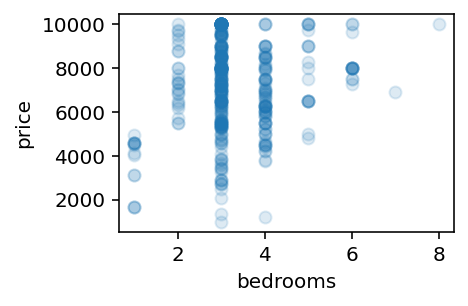

In [54]:
fig, ax = plt.subplots(figsize=(3,2))
ax.scatter(three_baths['bedrooms'],three_baths['price'],alpha=.15)
ax.set_xlabel("bedrooms")
ax.set_ylabel("price")
plt.show()

It's a bit hard to figure out where the biggest density lies given the smear of data, but there does seem to be a general upward trend that the more  bedrooms you have, the more expensive *at the 3-bath level*.  We can also consider the relationship for the apartments with other numbers of bathrooms.

### Question

Should we be confident in the relationship between bedrooms and price shown in that plot?

<br>
<br>
<br>
<br>

<font size=2>Well, there are many many other variables we are not controlling for, so I would say no, but...   It's probably covering most of the variation.</font>

### Exercise 4

1.  Group the data frame by `interest_level` and display the average value for the other columns.
1.  Using `ax.bar(...)`, draw a bar chart of interest level versus price; price is the Y axis.  Hint: use `ax.bar(df_avg['interest_level'], df_avg['price'])` where `df_avg` is your grouped data frame.

## Quick machine learning regression check

Just for fun, let's get a preview of how machine learning can help us.

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df_cheap[['bedrooms','bathrooms']]#,'latitude','longitude']]
y = df_cheap['price']

In [56]:
r = LinearRegression(normalize=True)
r.fit(X, y)
y_pred = r.predict(X)
print(f'y = {r.coef_[0]:.1f}*bedrooms + {r.coef_[1]:.1f}*bathrooms + {r.intercept_:.1f}')
print('R^2', r.score(X,y), "MAE", mean_absolute_error(y, y_pred))

y = 416.8*bedrooms + 1568.9*bathrooms + 966.4
R^2 0.4796698281431141 MAE 751.3176496416131


For unit increase in the number of bedrooms, the price is affected by 456 dollars and, similarly, a unit increase in the number of bathrooms affects the price by 751. Of course this is on average and totally ignores any confounding variables, of which there are many. This is the big hazard when using regression to look at the relative importance of variables.

To show you how easy it is to use a different, and more powerful, model  let's use a random forest:

In [57]:
from sklearn.ensemble import RandomForestRegressor

r = RandomForestRegressor(n_estimators=10)
r.fit(X, y)
y_pred = r.predict(X)
print('R^2', r.score(X,y), "MAE", mean_absolute_error(y, y_pred))

R^2 0.5144447953667692 MAE 729.380613515754


There is a small increase in accuracy, just by changing the model.

We can use something called permutation importance to get an idea of how important the various features are to prediction. The results more or less jive with what we found with linear regression, that bathrooms are more important than bedrooms in terms of price (on average).

In [58]:
from sklearn.inspection import permutation_importance

I = permutation_importance(r, X, y)
I['importances_mean']

array([0.26833345, 0.55920302])

## Analyzing text with wordclouds

We can't do a huge amount of text analysis without more sophisticated techniques, but we can do a simple visualization trick that tells us about the most common words in the apartment descriptions.

We begin by converting the description strings into lists of words, but first recall the following Python behavior:

In [59]:
" hi MSDS 593!  ".strip() # strip whitespace from the left and right

'hi MSDS 593!'

In [60]:
" hi MSDS 593!".strip().split() # gets a list of words

['hi', 'MSDS', '593!']

Turning to our data frame, there is a `str` accessor object that provides string-related functions, just as we did for categorical functions using accessor `cat`. In this case, we will use `df_rent['description'].str.`:

In [61]:
# First, normalize the text to be lowercase
df_rent['description'] = df_rent['description'].str.strip().str.lower()

# Now combine the strings from all rows in that column, separating them by space
text = df_rent['description'].str.cat(sep=' ')
print(f"There are {len(text)} chars")
text[0:100]

There are 28952192 chars


'spacious 1 bedroom 1 bathroom in williamsburg!apartment features:- renovated eat in kitchen with dis'

Now let's do a **word cloud**.

We are going to need a new package so please install. (Recall that any command preceded by `!` in a notebook cell is executed in the terminal.)

In [67]:
!pip install -q wordcloud
from wordcloud import WordCloud

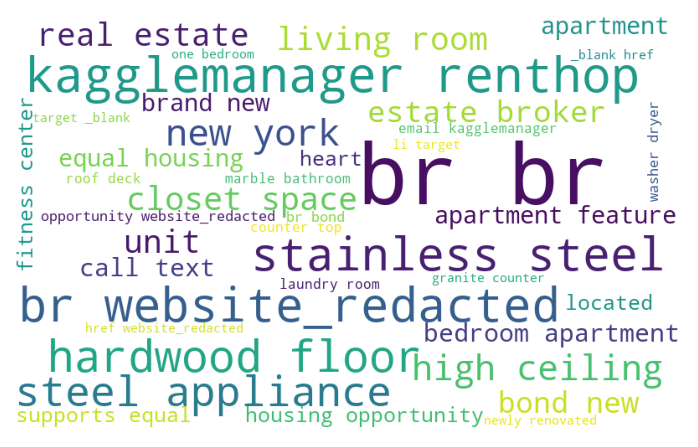

In [68]:
wordcloud = WordCloud(background_color='white', width=800, height=500, max_words=40)
wordcloud.generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

It looks like there are some strange things in there which we should get rid of using `stopwords` parameter:

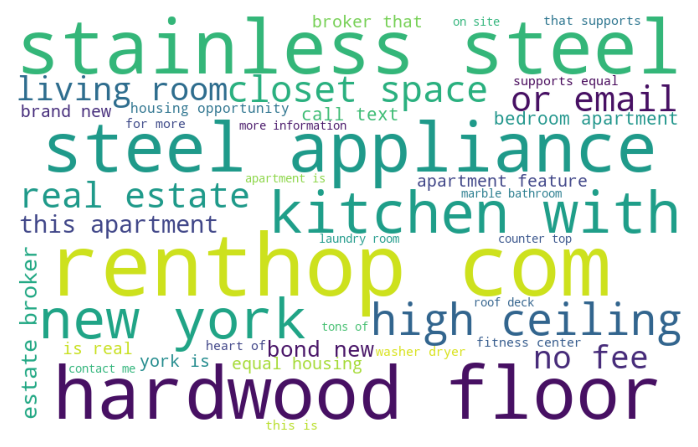

In [69]:
stopwords = ['br','kagglemanager','website_redacted','the','in','to']
wordcloud = WordCloud(background_color='white', stopwords=stopwords,
                      width=800, height=500, max_words=40)
wordcloud.generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Exercise 5

1.  Repeat the word cloud exercise yourself for the description
1.  Try to do the same thing for the features column; the difference here is that the features column elements are list objects not strings so you will need to use `df_rent['features'].str.join(' ')` and save that as another column or overwrite the features column. Then you can do the same `.str.cat(sep=' ')` operation followed by the word cloud.

### Exercise 6

Make a list of all of the key operations we performed in this notebook. For example, you can give an example of each and then a brief description. The goal here is to get these commands into your brain and the only way to do that is repetition. If you cut-and-paste, you will not learn very quickly at all!